<a href="https://colab.research.google.com/github/dipika7/job_recommender/blob/master/JobsRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobs Recommender System

### Imports

In [0]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673658 sha256=15752a5a57183e90a976d4e330faa3ffbc2c77c389b781bd923efd4a17103436
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
!pip install --upgrade pandas_profiling

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 614kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 13.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 296kB 21.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=c24b64eb64e6ae5c36ed56856b5bc2cadb0bc312abe30c6f601c61ef2b092103
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=765abe779353fd1dc45f43d0024e84edc598dd145b9121202b71f277db8f7e5c
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=37f3a48888c05c0c6be72c17d841274967f0be4ace2bbafe0d211

In [0]:
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from pandas_profiling import ProfileReport
import json
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory data analysis

In [0]:
#All offers dataframe
df_alloffers = pd.read_csv('/content/drive/My Drive/Sushant_Dipika_ML/ALL_Offers.csv')
df_alloffers.head()

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}}
1,2,published,Rhône,Expert process traitement thermique h/f,2,CDI,Entreprise Filiale européenne du groupe...,"{'skills': {'communication': 1, 'consulting': ..."
2,3,published,Paris,Charge d'operation grands comptes h/f,3,CDI,"Entreprise Notre client, première socié...","{'skills': {'collaboration': 1, 'reporting': 1..."
3,4,published,Rueil-Malmaison,Ingénieur Génie Civil stage F/H,4,Stage6mois,Entreprise Acteur mondial et leader eur...,"{'skills': {'collaboration': 1, 'ensemble': 1,..."
4,5,published,Levallois-Perret,Chargé pricing H/F,5,CDI,"Entreprise ALLIANCE AUTOMOTIVE France, ...","{'skills': {'collaboration': 1, 'leadership': 1}}"


In [0]:
#Pandas Profiling of All Offers
alloffers_profile = ProfileReport(df_alloffers, title="Pandas Profiling Report")
alloffers_profile.to_notebook_iframe()

In [0]:
#Clean skills
def sub_unicode(text):
  return re.sub(r'\\x[a-zA-Z0-9]{2}','', text)
df_alloffers['skills'] = df_alloffers['skills'].str.replace("'",'\"')
df_alloffers['skills'] = df_alloffers['skills'].apply(sub_unicode)
df_alloffers['skills'] = df_alloffers['skills'].apply(json.loads)
df_alloffers['skills'] = df_alloffers['skills'].apply(lambda x: x['skills'])
df_alloffers['skills'] 

0                                    {'communication': 1}
1       {'communication': 1, 'consulting': 1, 'enginee...
2       {'collaboration': 1, 'reporting': 1, 'ensemble...
3        {'collaboration': 1, 'ensemble': 1, 'matlab': 1}
4                   {'collaboration': 1, 'leadership': 1}
                              ...                        
8862                                                   {}
8863    {'go': 1, 'reporting': 1, 'design': 1, 'ensemb...
8864                                      {'ensemble': 1}
8865           {'go': 1, 'reporting': 1, 'innovation': 1}
8866                               {'mac': 1, 'rseau': 1}
Name: skills, Length: 8867, dtype: object

In [0]:
#Dropping unwanted columns
df_alloffers = df_alloffers.drop(['posted_by_id', 'status'], axis=1)

In [0]:
#Offers dataframe
df_offers = pd.read_csv('/content/drive/My Drive/Sushant_Dipika_ML/offers.csv')
df_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1..."
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '..."
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 4, 'designer': 1, 'pro..."


In [0]:
#Pandas Profiling of offers
offers_profile = ProfileReport(df_offers, title="Pandas Profiling Report")
offers_profile.to_notebook_iframe()

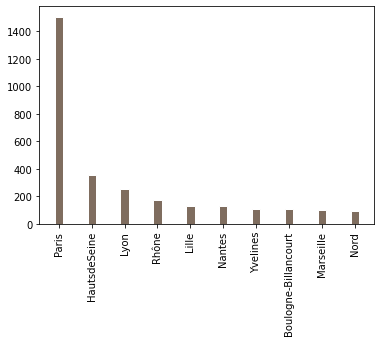

In [0]:
#Job distribution by city
df_counts=df_alloffers.groupby(['city']).agg({'status': ['count']}).reset_index()
df_counts.columns = df_counts.columns.droplevel(1) 
df_counts=df_counts.sort_values(by='status',ascending=False).head(10)
barWidth = 0.25 
x=df_counts['city']
y=df_counts['status']
plt.bar(x, y, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.xticks(rotation=90)
plt.show()

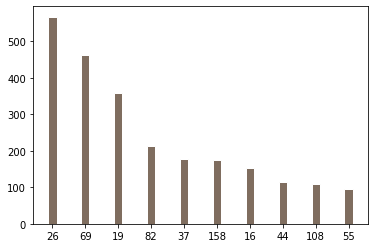

In [0]:
#Job distribution by organization_id
df_counts=df_alloffers.groupby(['organization_id']).agg({'status': ['count']}).reset_index()
df_counts.columns = df_counts.columns.droplevel(1) 
df_counts=df_counts.sort_values(by='status',ascending=False).head(10)
barWidth = 0.25 
df_counts['organization_id'] = df_counts['organization_id'].apply(str)
x=df_counts['organization_id']
y=df_counts['status']
plt.bar(x, y, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.show()

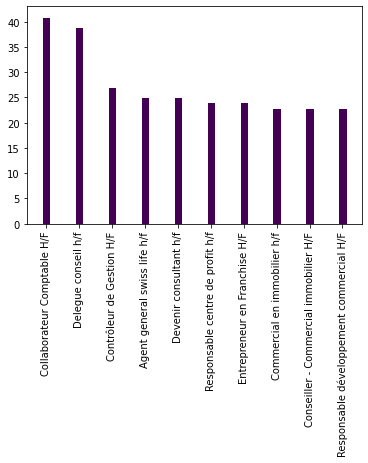

In [0]:
#Job distribution by job_title
df_counts=df_alloffers.groupby(['job_title']).agg({'status': ['count']}).reset_index()
df_counts.columns = df_counts.columns.droplevel(1) 
df_counts=df_counts.sort_values(by='status',ascending=False).head(10)
barWidth = 0.25 
viridis = cm.get_cmap('viridis',1)
x=df_counts['job_title']
y=df_counts['status']
plt.bar(x, y, width=barWidth, edgecolor='white', label='var1', color=viridis.colors)
plt.xticks(rotation=90)
plt.show()

In [0]:
#Data Cleaning
def sub_unicode(text):
  return re.sub(r'\\x[a-zA-Z0-9]{2}','', text)
df_offers['skills'] = df_offers['skills'].str.replace("'",'\"')
df_offers['skills'] = df_offers['skills'].apply(sub_unicode)
df_offers['skills'] = df_offers['skills'].apply(json.loads)
df_offers['skills'] = df_offers['skills'].apply(lambda x: x['skills'])

In [0]:
#Getting a list of unique skills required by the jobs and the skills of the job seekers
all_skills = []
for i in df_alloffers['skills']:
  all_skills += list(i.keys())
for i in df_offers['skills']:
  all_skills += list(i.keys())

all_skills = list(set(all_skills))

In [0]:
#Creating a pivot table for all offers available
skill_list_alloffers = np.zeros((len(df_alloffers), len(all_skills)), dtype=int)

for i, skills in enumerate(df_alloffers['skills']):
  for key, val in skills.items():
    skill_list_alloffers[i][all_skills.index(key)] = val

In [0]:
skill_df_alloffers = pd.DataFrame(skill_list_alloffers, columns=all_skills)
skill_df_alloffers

,sas,devops,windows,communication technologies,centreon,web analytics,wordpress,verbal communication,wpf,sdk android,organizational,a/b testing,collaboration,groovy,microsoft project,typescript,machine learning,google maps,php,vmware,dos,soap,asp.net,mathematics,iot,apache,arduino,implementation,assembleur,website development,postgresql,network security,design patterns,sharepoint,e-commerce,powerpoint,creating data,linux,wcf,interpersonal,...,etl,nodejs,diagnostics,sip,engineering,information security,dynamodb,swift,pascal,cucumber,mariadb,go,jquery,jsp,mvvm,api rest,ms sql server,microsoft windows,tableau,soa,db2,grav,redis,angular2,microsoft visual,processing,itil,postfix,objective c,microsoft excel,nlp,ms access,optimisations,selenium,penetration testing,extjs,swing,pl/sql,sql server,git
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Creating a pivot table for offers dataframe
skill_list_offers = np.zeros((len(df_offers), len(all_skills)), dtype=int)

for i, skills in enumerate(df_offers['skills']):
  for key, val in skills.items():
    skill_list_offers[i][all_skills.index(key)] = val

In [0]:
skill_df_offers = pd.DataFrame(skill_list_offers, columns=all_skills)
skill_df_offers

,sas,devops,windows,communication technologies,centreon,web analytics,wordpress,verbal communication,wpf,sdk android,organizational,a/b testing,collaboration,groovy,microsoft project,typescript,machine learning,google maps,php,vmware,dos,soap,asp.net,mathematics,iot,apache,arduino,implementation,assembleur,website development,postgresql,network security,design patterns,sharepoint,e-commerce,powerpoint,creating data,linux,wcf,interpersonal,...,etl,nodejs,diagnostics,sip,engineering,information security,dynamodb,swift,pascal,cucumber,mariadb,go,jquery,jsp,mvvm,api rest,ms sql server,microsoft windows,tableau,soa,db2,grav,redis,angular2,microsoft visual,processing,itil,postfix,objective c,microsoft excel,nlp,ms access,optimisations,selenium,penetration testing,extjs,swing,pl/sql,sql server,git
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#unique user_ids
merged_df =skill_df_offers.merge(df_offers, left_index=True,right_index=True)
merged_df=merged_df.drop(columns=['status','city','job_title','organization_id','contracts','description','skills'])
merged_df=merged_df.groupby('user_id').max().reset_index()
merged_df.drop(columns="")

,user_id,sas,devops,windows,communication technologies,centreon,web analytics,wordpress,verbal communication,wpf,sdk android,organizational,a/b testing,collaboration,groovy,microsoft project,typescript,machine learning,google maps,php,vmware,dos,soap,asp.net,mathematics,iot,apache,arduino,implementation,assembleur,website development,postgresql,network security,design patterns,sharepoint,e-commerce,powerpoint,creating data,linux,wcf,...,etl,nodejs,diagnostics,sip,engineering,information security,dynamodb,swift,pascal,cucumber,mariadb,go,jquery,jsp,mvvm,api rest,ms sql server,microsoft windows,tableau,soa,db2,grav,redis,angular2,microsoft visual,processing,itil,postfix,objective c,microsoft excel,nlp,ms access,optimisations,selenium,penetration testing,extjs,swing,pl/sql,sql server,git
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,200,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Similarity matrix based on the user skills and organization skills
sim_mat = []
for u, user_id in enumerate(merged_df['user_id']):
  for o, _ in enumerate(df_alloffers['organization_id']):
    u_skill_list = np.array(merged_df.iloc[u])
    o_skill_list = np.array(skill_df_alloffers.iloc[o])
    
    sim_mat.append([user_id, o, np.linalg.norm(u_skill_list[1:] - o_skill_list)])
#sim_mat

[[2, 0, 4.795831523312719],
 [2, 1, 5.0990195135927845],
 [2, 2, 5.5677643628300215],
 [2, 3, 5.744562646538029],
 [2, 4, 5.656854249492381],
 [2, 5, 5.5677643628300215],
 [2, 6, 5.477225575051661],
 [2, 7, 5.477225575051661],
 [2, 8, 5.656854249492381],
 [2, 9, 5.656854249492381],
 [2, 10, 5.656854249492381],
 [2, 11, 6.48074069840786],
 [2, 12, 5.830951894845301],
 [2, 13, 6.4031242374328485],
 [2, 14, 5.656854249492381],
 [2, 15, 5.385164807134504],
 [2, 16, 6.0],
 [2, 17, 5.477225575051661],
 [2, 18, 5.916079783099616],
 [2, 19, 5.5677643628300215],
 [2, 20, 4.0],
 [2, 21, 7.0],
 [2, 22, 6.855654600401044],
 [2, 23, 5.744562646538029],
 [2, 24, 5.0],
 [2, 25, 4.795831523312719],
 [2, 26, 5.5677643628300215],
 [2, 27, 5.916079783099616],
 [2, 28, 5.477225575051661],
 [2, 29, 5.5677643628300215],
 [2, 30, 5.5677643628300215],
 [2, 31, 6.782329983125268],
 [2, 32, 5.916079783099616],
 [2, 33, 6.782329983125268],
 [2, 34, 5.291502622129181],
 [2, 35, 4.47213595499958],
 [2, 36, 5.56776

In [0]:
#Dataframe of the similarity of the user skills and the skills required by organizations. Lower the difference, higher is the similarity.
df_sim = pd.DataFrame(sim_mat, columns=['u_id', 'o_id','difference'])
df_sim

,u_id,o_id,difference
0,2,0,4.795832
1,2,1,5.099020
2,2,2,5.567764
3,2,3,5.744563
4,2,4,5.656854
...,...,...,...
1773395,201,8862,1.000000
1773396,201,8863,2.236068
1773397,201,8864,1.414214
1773398,201,8865,2.000000


In [0]:
#Recommends jobs
try:
    userid = int(input("Enter User ID: "))
except:
    print("Invalid User ID.")
jobs=df_sim[df_sim['u_id']==userid]
if jobs.empty:
  print("Invalid User ID.")
else:
  jobs=pd.DataFrame(jobs.sort_values('difference', ascending = True))[:11]
  alloffers=df_alloffers.reset_index()
  recommended=jobs.merge(alloffers, how='inner',left_on='o_id',right_on='index')
  recommended=recommended.drop(columns=['skills','u_id','contracts','index']).reset_index(drop=True)
recommended

Enter User ID: 7


,o_id,difference,city,job_title,organization_id,description
0,2080,19.849433,Issy-les-Moulineaux,Responsable Coaching Innovation H/F,406,Entreprise Nous vous proposons de rejoi...
1,1962,20.493902,Paris,Business Analyst IT Product & Design H/F,69,"Entreprise Notre client, grande entrepr..."
2,3568,20.518285,Haute-Savoie,Ingenieur design suisse h/f,108,Entreprise 1er Groupe français indépend...
3,8547,20.663978,Courbevoie,Responsable de projet POC H/F,406,Entreprise Nous vous proposons de rejoi...
4,5188,20.952327,Rhône,Chef de Projet Innovation IoT H/F,25,Entreprise Notre client est un groupe l...
5,6204,21.047565,Sarthe,Chef de secteur nord ouest france h/f,1162,Entreprise Fatboy est une entreprise je...
6,4468,21.071308,Neuilly-sur-Seine,Consultant senior en organisation Secteur Public,177,Entreprise Rejoignez-nous !Cabinet de c...
7,1924,21.095023,Saint-Martin-le-Nœud,Global Technology & Standards - Ingé H/F,500,"Entreprise Au sein de Faurecia, nous so..."
8,67,21.213203,Lyon,Architecte IT senior H/F,60,Entreprise The Adecco GroupThe Adecco G...
9,2660,21.260292,Paris,Ux designer h/f,26,"Entreprise Notre client, pure player le..."
